In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# load data
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
print(X_train[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

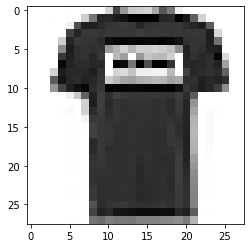

In [5]:
#visu
plt.imshow(X_train[1], cmap = plt.cm.binary) # (use cmap for remove extra color)
plt.show()

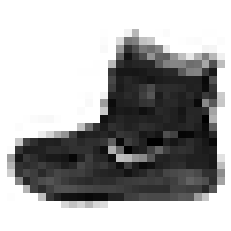

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
print(y_train[0])

9


In [8]:
#corresponding class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Ankle boot'

In [10]:
#scaling our train
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

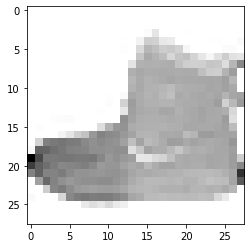

In [11]:
plt.imshow(X_train[0], cmap = plt.cm.binary) # (use cmap for remove extra color)
plt.show()

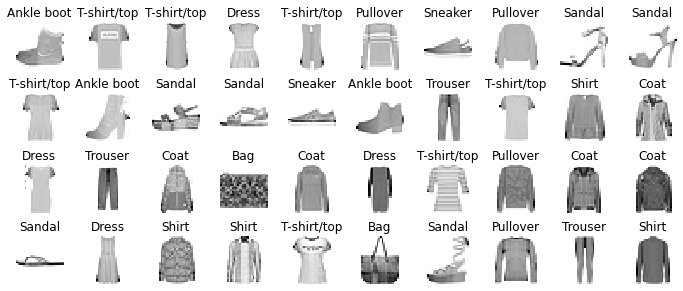

In [12]:
#Let's take a look at a sample of the images in the dataset:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
#build model

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = "softmax"))


In [14]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
#parameters for traing our model
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# train model

history = model.fit(X_train,y_train,validation_split=0.2,epochs=30,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 10s 206us/sample - loss: 1.0605 - accuracy: 0.6695 - val_loss: 0.6499 - val_accuracy: 0.7752
Epoch 2/30
48000/48000 [==============================] - 9s 185us/sample - loss: 0.5872 - accuracy: 0.7910 - val_loss: 0.5306 - val_accuracy: 0.8088
Epoch 3/30
48000/48000 [==============================] - 9s 187us/sample - loss: 0.5117 - accuracy: 0.8155 - val_loss: 0.4937 - val_accuracy: 0.8148
Epoch 4/30
48000/48000 [==============================] - 9s 187us/sample - loss: 0.4748 - accuracy: 0.8301 - val_loss: 0.4586 - val_accuracy: 0.8310
Epoch 5/30
48000/48000 [==============================] - 9s 185us/sample - loss: 0.4495 - accuracy: 0.8385 - val_loss: 0.4398 - val_accuracy: 0.8418
Epoch 6/30
48000/48000 [==============================] - 9s 185us/sample - loss: 0.4300 - accuracy: 0.8457 - val_loss: 0.4253 - val_accuracy: 0.8463
Epoch 7/30
48000/48000 [=========================

In [17]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1500,
 'samples': 48000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
25,0.287376,0.896937,0.336500,0.879167,25
26,0.284431,0.897458,0.338844,0.874500,26
27,0.280363,0.897625,0.334501,0.876500,27
28,0.277939,0.899354,0.332919,0.878167,28
29,0.274292,0.900979,0.335614,0.876917,29


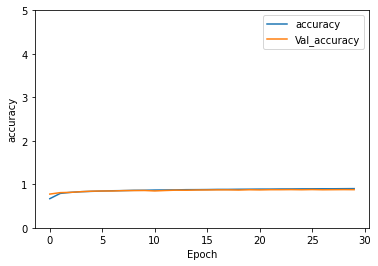

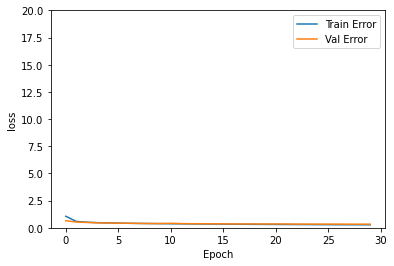

In [19]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'],hist['accuracy'],
            label='accuracy')
    plt.plot(hist['epoch'],hist['val_accuracy'],
            label='Val_accuracy')
    
    plt.legend()
    plt.ylim([0,5])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'],hist['loss'],
            label='Train Error')
    plt.plot(hist['epoch'],hist['val_loss'],
            label='Val Error')
    
    plt.legend()
    plt.ylim([0,20])
    
plot_history(history)

In [25]:
#check the model in real data.
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 138us/sample - loss: 0.3664 - accuracy: 0.8687


[0.36643691462278366, 0.8687]

In [36]:
#using the model to make prediction
X_new = X_test[:4]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.  , 0.95],
       [0.  , 0.  , 0.98, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
#prediction
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1], dtype=int64)

In [29]:
#check predicted classes
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

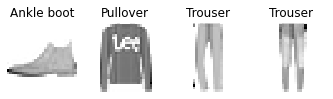

In [44]:
#visualization actual 
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 4, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

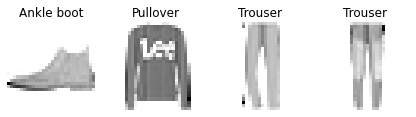

In [45]:
#visualization predicted
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 4, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()